# Performing 1-way ANOVA manually in Python

The dataset contains results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. With ANOVA here we want to determine if the type of treatment has an impact on the weight.

The general purpose of 1-way ANOVA is to determine whether the means of 2 or more populations differ. Namely, what is the effect of a nominal / categorical variable (~ factor) on the dependent variable.

This is done computing:
* Sum of Squares Between groups (SSB)
* Sum of Sqaures Within groups (SSW)
* Mean Sum of squares Between groups (MSB)
* Mean Sum of squares Within groups (MSW)
* The F-statistic MSB / MSW

Then an hypothesis test is performed (F follows a Fisher distribution), H0 being that there is no difference among the population means (that is the factor has no influence).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import f_oneway
from scipy.stats import f

%matplotlib inline

Read the dataset and get a feeling of the data:

In [2]:
df = pd.read_csv('./data/PlantGrowth.csv', index_col=0)
df.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


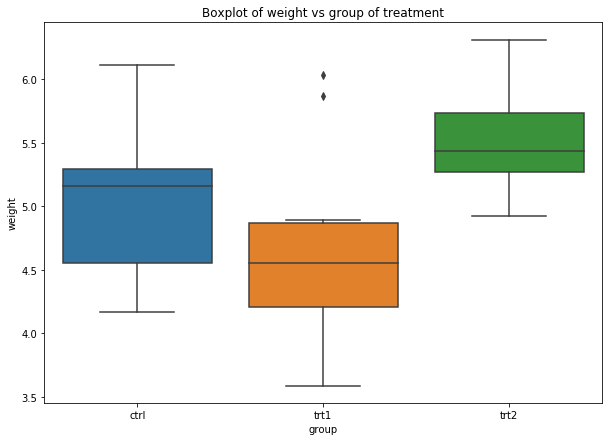

In [3]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='group', y='weight')
plt.title('Boxplot of weight vs group of treatment');

## Compute means and counts for each group

In [4]:
ctrl_mask = df['group'] == 'ctrl'
ctrl = df.loc[ctrl_mask, 'weight']
m_ctrl = ctrl.mean()
n_ctrl = ctrl.shape[0]

In [5]:
trt1_mask = df['group'] == 'trt1'
trt1 = df.loc[trt1_mask, 'weight']
m_trt1 = trt1.mean()
n_trt1 = trt1.shape[0]

In [6]:
trt2_mask = df['group'] == 'trt2'
trt2 = df.loc[trt2_mask, 'weight']
m_trt2 = trt2.mean()
n_trt2 = trt2.shape[0]

In [7]:
m = df['weight'].mean()
n = df.shape[0]

## Compute Sum of Squares Within (SSW)

In [8]:
SS_ctrl = ((ctrl - m_ctrl)**2).sum()
SS_trt1 = ((trt1 - m_trt1)**2).sum()
SS_trt2 = ((trt2 - m_trt2)**2).sum()

Compute Sum of Squares Within by adding up the previous SS:

In [9]:
SSW = SS_ctrl + SS_trt1 + SS_trt2

## Compute Sum of Sqaures Between (SSB)

In [10]:
SSB = n_ctrl * (m_ctrl - m)**2 + n_trt1 * (m_trt1 - m)**2 + n_trt2 * (m_trt2 - m)**2

## Compute Mean Sum of Squares Within and Mean Sum of Squares Betwwen (MSW, MSB)

In [11]:
k = 3  # number of groups
MSW = SSW / (n - k)
MSB = SSB / (k - 1)

## Perform F-test

In [13]:
df_num = k  # number of groups
df_denum = n - k  # number of samples - number of groups

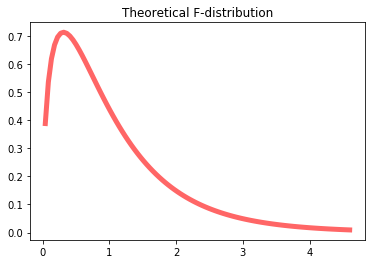

In [14]:
x = np.linspace(f.ppf(0.01, df_num, df_denum), f.ppf(0.99, df_num, df_denum), 100)
plt.plot(x, f.pdf(x, df_num, df_denum), 'r-', lw=5, alpha=0.6, label='f pdf')
plt.title('Theoretical F-distribution');

In [15]:
F = MSB / MSW
p_value = (1-f.cdf(F, df_num, df_denum)) * 2  # two-sided tests
F_critical = f.ppf(0.95, df_num, df_denum)

print('F value: %.2f' % F)
print('F-critical: %.2f'% F_critical)
print('p-value: %.4f' % p_value)

F value: 4.85
F-critical: 2.96
p-value: 0.0159


p-value < 0.05 so that H0 can be rejected, there is a difference among the three group means.

For reference, the same result can be obtained using `scipy.stats.f_oneway`, in one line, see below:

In [16]:
f_oneway(ctrl, trt1, trt2)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)